<a href="https://colab.research.google.com/github/hiba-moideen1/thesis/blob/main/Thesis_Dysgraphia_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

In [2]:
!pip install opencv-python

In [3]:
!pip install graphviz

In [4]:
!pip install tensorflow

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Flatten , MaxPooling2D , Dense , Dropout , GlobalAveragePooling2D
from tensorflow.keras import losses , optimizers
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import pickle
import cv2
# System libraries
from pathlib import Path
import PIL
from PIL import UnidentifiedImageError
import os.path
import tkinter

In [6]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [7]:
!unzip 'gdrive/MyDrive/Colab Notebooks/prj/Dataset_dysgraphia.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1266.4IOwg.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1267.sgNiH.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1268.okrK0.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1269.WGV1I.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1270.AAguI.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1271.acDMI.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1272.9422e.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1273.9WXvR.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1274.xyaXZ.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Train/Reversal/e-1275.Dw004.png  
  inflating: Dataset Dyslexia_Password WanAsy321/Gambo/Trai

In [8]:
dataTrain = Path("/content/Dataset Dyslexia_Password WanAsy321/Gambo/Train")

In [9]:
dataTest = Path("/content/Dataset Dyslexia_Password WanAsy321/Gambo/Test")

In [10]:
filepath = list(dataTrain.glob(r"**/*.png"))
filepath_test = list(dataTest.glob(r"**/*.png"))

In [11]:
print(filepath[20])

/content/Dataset Dyslexia_Password WanAsy321/Gambo/Train/Corrected/8_5245.png


In [12]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))
labels_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath_test))

filepath = pd.Series(filepath, name='Filepath').astype(str)
filepath_test = pd.Series(filepath_test, name='Filepath').astype(str)
print(labels_test[30000])

Normal


In [13]:
labels = pd.Series(labels,name="Labels")
labels_test = pd.Series(labels_test,name="Labels")

In [14]:
TrainData = pd.concat([filepath,labels],axis=1)
TrainData

,Filepath,Labels
0,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
1,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
2,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
3,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
4,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
...,...,...
151644,/content/Dataset Dyslexia_Password WanAsy321/G...,Reversal
151645,/content/Dataset Dyslexia_Password WanAsy321/G...,Reversal
151646,/content/Dataset Dyslexia_Password WanAsy321/G...,Reversal
151647,/content/Dataset Dyslexia_Password WanAsy321/G...,Reversal


In [15]:
TestData = pd.concat([filepath_test,labels_test],axis=1)
TestData

,Filepath,Labels
0,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
1,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
2,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
3,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
4,/content/Dataset Dyslexia_Password WanAsy321/G...,Corrected
...,...,...
56718,/content/Dataset Dyslexia_Password WanAsy321/G...,Reversal
56719,/content/Dataset Dyslexia_Password WanAsy321/G...,Reversal
56720,/content/Dataset Dyslexia_Password WanAsy321/G...,Reversal
56721,/content/Dataset Dyslexia_Password WanAsy321/G...,Reversal


In [16]:
AugPath = Path("Train").rglob("*.png")
for imageP in AugPath:
    try:
        img = PIL.Image.open(imageP)
    except PIL.UnidentifiedImageError:
        print(imageP)

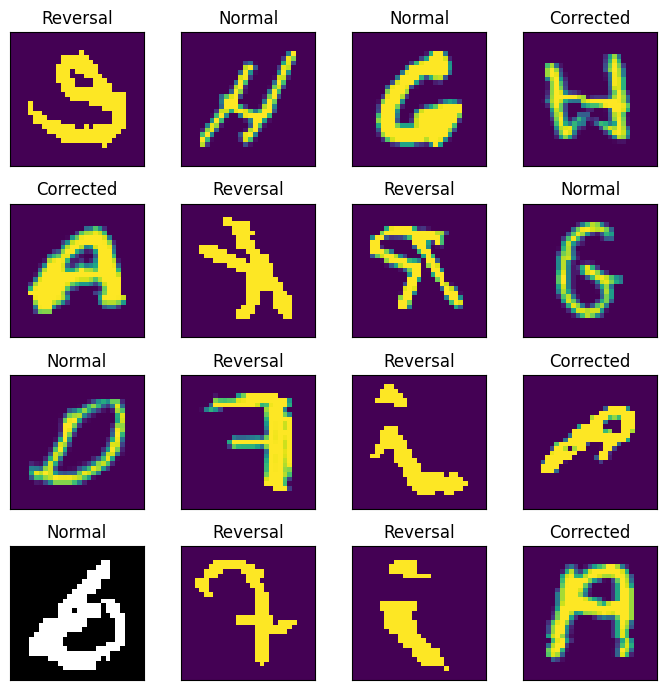

In [ ]:
# Display 20 picture of the dataset with their labels
random_index = np.random.randint(0 , len(TrainData) , 20)
fig,axes = plt.subplots(nrows=4 , ncols=4 , figsize=(7,7) , subplot_kw={'xticks': [], 'yticks': []} )

for i , ax in enumerate(axes.flat):
    ax.imshow(plt.imread(TrainData.Filepath[random_index[i]]))
    ax.set_title(TrainData.Labels[random_index[i]])
plt.tight_layout()
plt.show()

In [17]:
datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_image = datagen.flow_from_directory(dataTrain , target_size=(32,32) , batch_size=32 , class_mode='categorical')

Found 151649 images belonging to 3 classes.


In [19]:
test_image = datagen.flow_from_directory(dataTest , target_size=(32,32) , batch_size=32 , class_mode='categorical')

Found 56723 images belonging to 3 classes.


In [20]:
train_image

In [21]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [23]:
model.compile(loss='categorical_crossentropy' , optimizer=optimizers.Adam() , metrics=['accuracy'] )

In [ ]:
!pip install keras --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [24]:
history = model.fit(train_image, epochs=30, batch_size=28,  validation_data = test_image,  verbose=1)
# CNNhistory = model.fit(train_image , steps_per_epoch=len(train_image) , validation_data= test_image , validation_steps=len(test_image) , epochs=10)
# save the model
pickle.dump(model, open('CNNModel.pkl', 'wb'))

Epoch 1/30
4740/4740 [==============================] - 95s 19ms/step - loss: 0.1994 - accuracy: 0.9248 - val_loss: 0.3396 - val_accuracy: 0.8877
Epoch 2/30
4740/4740 [==============================] - 85s 18ms/step - loss: 0.0816 - accuracy: 0.9706 - val_loss: 0.3687 - val_accuracy: 0.8892
Epoch 3/30
4740/4740 [==============================] - 85s 18ms/step - loss: 0.0571 - accuracy: 0.9797 - val_loss: 0.5495 - val_accuracy: 0.8852
Epoch 4/30
4740/4740 [==============================] - 84s 18ms/step - loss: 0.0459 - accuracy: 0.9842 - val_loss: 0.4600 - val_accuracy: 0.8824
Epoch 5/30
4740/4740 [==============================] - 85s 18ms/step - loss: 0.0382 - accuracy: 0.9871 - val_loss: 0.5484 - val_accuracy: 0.8855
Epoch 6/30
4740/4740 [==============================] - 85s 18ms/step - loss: 0.0349 - accuracy: 0.9880 - val_loss: 0.5178 - val_accuracy: 0.8859
Epoch 7/30
4740/4740 [==============================] - 86s 18ms/step - loss: 0.0318 - accuracy: 0.9892 - val_loss: 0.5617 -

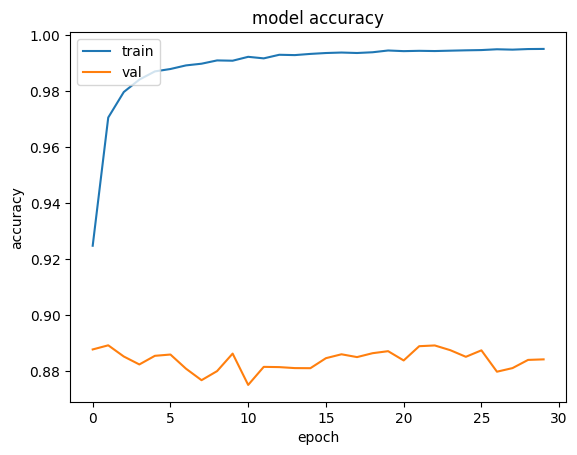

In [25]:
# Plot Accuracy and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

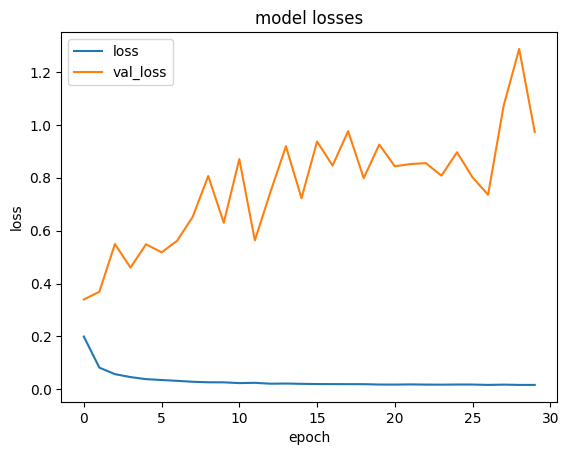

In [26]:
# Plot loss and val_loss accuarcy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [27]:
# to save model
keras.models.save_model(model , 'saved_cnn_model')

In [28]:
# Load model
CNNModel = keras.models.load_model('saved_cnn_model')

In [35]:
#Uploading a random normal handwritten character for prediction
path=["/content/A-41.png","/content/A-42.png","/content/4_1.png"] # 2 reve and 1 corrected

In [36]:
def TestInput(CNNModelSaved , imgMatrix):
    labels=["0 - Normal","1 - Reversal","2 - Corrected"]
    imgMatrix = cv2.resize(imgMatrix , (32,32))
    imgMatrix = imgMatrix.astype('float32')
    imgMatrix /= 255.0
    imgMatrix = cv2.cvtColor(imgMatrix, cv2.COLOR_BGR2RGB)
    imgMatrix = imgMatrix.reshape((1, 32, 32, 3))
    c = CNNModelSaved.predict(imgMatrix)
    p = np.argmax(c)
    return labels[p]

In [37]:
i=0
for x in path:
  img = plt.imread(path[i])
  PredictValue = TestInput(CNNModel , img)
  print(PredictValue)
  i=i+1

1/1 [==============================] - 0s 28ms/step
0 - Normal
1/1 [==============================] - 0s 17ms/step
0 - Normal
1/1 [==============================] - 0s 16ms/step
0 - Normal


In [38]:
#EfficientNet

In [39]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # validation_split=0.2  # Adjust validation split as needed
)

train_generator = train_datagen.flow_from_directory(
    '/content/Dataset Dyslexia_Password WanAsy321/Gambo/Train',
    target_size=(224, 224),  # Adjust based on EfficientNet model input size
    batch_size=32,
    class_mode='categorical',
    # subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/Dataset Dyslexia_Password WanAsy321/Gambo/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    # subset='validation'
)

Found 151649 images belonging to 3 classes.
Found 56723 images belonging to 3 classes.


In [40]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import EfficientNetB0, EfficientNetB1
from keras import layers, models

base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


16705208/16705208 [==============================] - 1s 0us/step


In [41]:
base_model1 = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in base_model.layers[-20:]:
    layer.trainable = True

In [42]:
ef_model = models.Sequential()
ef_model.add(base_model)
ef_model.add(layers.GlobalAveragePooling2D())
ef_model.add(layers.BatchNormalization())
ef_model.add(layers.Dense(256, activation='relu'))
ef_model.add(layers.BatchNormalization())
ef_model.add(layers.Dropout(0.5))
ef_model.add(layers.BatchNormalization())
ef_model.add(layers.Dense(3, activation='softmax'))  # 3 classes, adjust based on your specific case


In [48]:
ef_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
ef_history = ef_model.fit(train_generator, epochs=10, batch_size=28,  validation_data = validation_generator,  verbose=1, callbacks=early_stopping)
# save the model
pickle.dump(ef_model, open('EFModel.pkl', 'wb'))

Epoch 1/10


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7b3a7787f370>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7b3a7787f370>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4740/4740 [==============================] - ETA: 0s - loss: 0.3303 - accuracy: 0.8407

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7b3a6e1ec430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7b3a6e1ec430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4740/4740 [==============================] - 3043s 633ms/step - loss: 0.3303 - accuracy: 0.8407 - val_loss: 3.5889 - val_accuracy: 0.3448
Epoch 2/10
4740/4740 [==============================] - 2982s 629ms/step - loss: 0.2238 - accuracy: 0.8802 - val_loss: 3.1363 - val_accuracy: 0.3407
Epoch 3/10
4740/4740 [==============================] - 3005s 634ms/step - loss: 0.2035 - accuracy: 0.8887 - val_loss: 1.0401 - val_accuracy: 0.5210
Epoch 4/

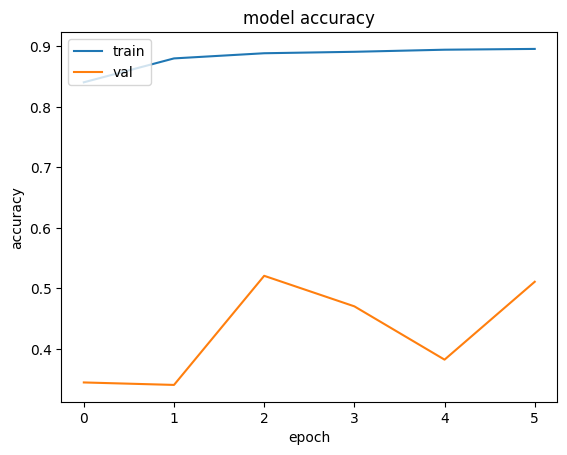

In [ ]:
# Plot Accuracy and validation accuarcy
plt.plot(ef_history.history['accuracy'])
plt.plot(ef_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [43]:
#We can see intense overfitting in this model

In [44]:
#data sugmentation and splitting train dataset to train and validation
ef1train_datagen = ImageDataGenerator(
    rescale=1./255,
    # shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    horizontal_flip=False,
    # validation_split=0.2  # Adjust validation split as needed
)

ef1train_generator = ef1train_datagen.flow_from_directory(
    '/content/Dataset Dyslexia_Password WanAsy321/Gambo/Train',
    target_size=(224, 224),  # Adjust based on EfficientNet model input size
    batch_size=32,
    class_mode='categorical',
    # subset='training'
)

ef1validation_generator = ef1train_datagen.flow_from_directory(
    '/content/Dataset Dyslexia_Password WanAsy321/Gambo/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    # subset='validation'
)


Found 151649 images belonging to 3 classes.
Found 56723 images belonging to 3 classes.


In [64]:
from tensorflow.keras import regularizers #Incorporate L2 regularization in your dense layers to penalize large weights.

ef1_model = models.Sequential()
ef1_model.add(base_model1)
ef1_model.add(layers.GlobalAveragePooling2D())
ef1_model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
ef1_model.add(layers.Dense(128, activation='relu'))# added additional dense layer
ef1_model.add(layers.BatchNormalization())
ef1_model.add(layers.Dense(64, activation='relu'))# added additional dense layer
ef1_model.add(layers.Dropout(0.5))
ef1_model.add(layers.Dense(3, activation='softmax'))  # 3 classes, adjust based on your specific case

In [65]:
#learning rate scheduler
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        return lr * 0.9
    return lr

opt = Adam(learning_rate=0.0001)
lr_schedule = LearningRateScheduler(lr_scheduler)

ef1_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
#also making use of augmented data for training
ef1_history = ef1_model.fit(ef1train_generator,  batch_size=32, epochs=5,  validation_data = ef1validation_generator,  verbose=1, callbacks=early_stopping)
# save the model
pickle.dump(ef1_history, open('EF1Model.pkl', 'wb'))

Epoch 1/5
4740/4740 [==============================] - 3058s 625ms/step - loss: 0.3794 - accuracy: 0.9899 - val_loss: 0.4212 - val_accuracy: 0.9135
Epoch 2/5
4740/4740 [==============================] - 2927s 618ms/step - loss: 0.0242 - accuracy: 0.9941 - val_loss: 0.3997 - val_accuracy: 0.9011
Epoch 3/5
4740/4740 [==============================] - 2918s 615ms/step - loss: 0.0189 - accuracy: 0.9951 - val_loss: 0.5079 - val_accuracy: 0.8809
Epoch 4/5
4740/4740 [==============================] - 2918s 616ms/step - loss: 0.0168 - accuracy: 0.9956 - val_loss: 0.3909 - val_accuracy: 0.8933
Epoch 5/5
4740/4740 [==============================] - 2900s 612ms/step - loss: 0.0141 - accuracy: 0.9961 - val_loss: 0.4854 - val_accuracy: 0.9154


In [78]:
# to save model
keras.models.save_model(ef1_model , 'saved_ef_model')

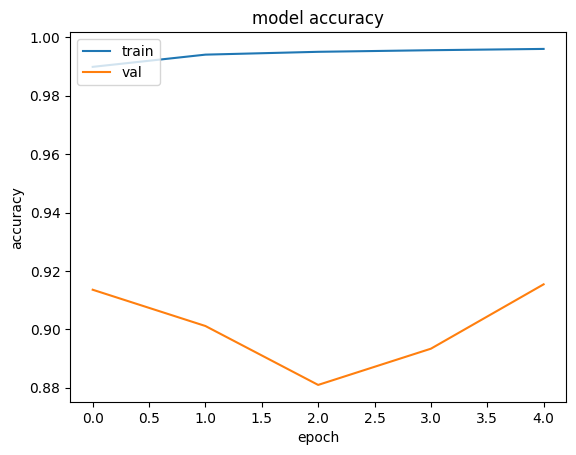

In [69]:
# Plot Accuracy and validation accuarcy
plt.plot(ef1_history.history['accuracy'])
plt.plot(ef1_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

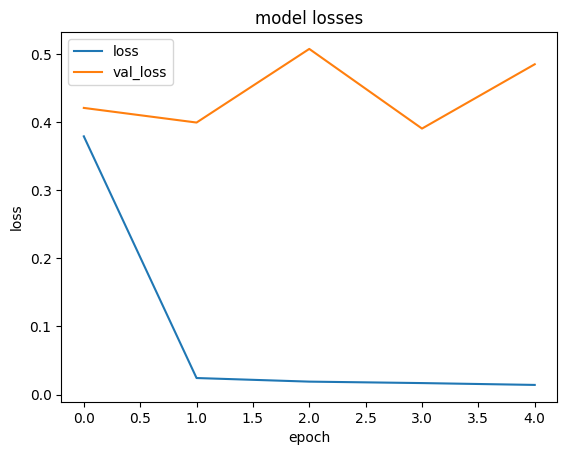

In [70]:
# Plot loss and val_loss accuarcy
plt.plot(ef1_history.history['loss'])
plt.plot(ef1_history.history['val_loss'])
plt.title('model losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [79]:
# Load model
EFModel = keras.models.load_model('saved_ef_model')

In [73]:
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values to [0, 1]
    return img_array

# Example: Load three random images
image_paths = ['/content/1_1.png', '/content/4_1.png', '/content/A-42.png']

test_images = [preprocess_image(img_path) for img_path in image_paths]
test_images = np.vstack(test_images)

In [74]:
predictions = EFModel.predict(test_images)

# Assuming you have three classes, get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted Labels:", predicted_labels)

1/1 [==============================] - 3s 3s/step
Predicted Labels: [2 0 1]


In [84]:
# Saving the model for Future Inferences

model_json = ef1_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [87]:
# Saving Trained Models With h5py. Once the model is prepared with the trained weights, we're ready to use it for inference.

from keras.models import model_from_json

# opening and store file in a variable

json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = model_from_json(loaded_model_json)
print("Loaded Model Summary:")
loaded_model.summary()
# load weights into new model

loaded_model.load_weights("model.h5", by_name = True, skip_mismatch = True)
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


Loaded Model Summary:
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_6  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_22 (Dense)            (None, 256)               327936    
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_11 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                